In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
df_alcohol = pd.read_csv("../data/clean_data/alcohol_adam.csv")
df_alcohol.set_index('Country Code', inplace=True, drop=True)
df_alcohol_2 = pd.read_csv("../data/clean_data/alcohol_adam.csv")
#df_alcohol_2 = pd.read_csv("C:/Users/adama/Desktop/DrinkAndBeHapPY/data/clean_data/alcohol.csv")

In [3]:
list_countries = df_alcohol_2["Country Code"].unique()
num_countries = df_alcohol_2["Country Code"].nunique()
list_years = ["2016", "2015", "2014", "2013", "2012", "2011", "2010"]
#need to change nan not NA for namibia, for some rason interpreted as NaN, fixing namibia
list_countries[108] = 'NA'
df_alcohol_2.at[580, 'Country Code'] = 'NA'
df_alcohol_2.at[581, 'Country Code'] = 'NA'
df_alcohol_2.at[582, 'Country Code'] = 'NA'
df_alcohol_2.at[583, 'Country Code'] = 'NA'
df_alcohol_2.at[584, 'Country Code'] = 'NA'
#print(num_countries)
#print(list_countries)

In [4]:
country_df = df_alcohol_2.loc[df_alcohol_2['Country Code'] == 'MM']
print(country_df)
#print(df_alcohol_2)

    Country Code  Country  Data Source             Beverage Types  2016  2015  \
575           MM  Myanmar  Data source                  All types   NaN  1.60   
576           MM  Myanmar  Data source                       Beer   NaN  0.36   
577           MM  Myanmar  Data source                       Wine   NaN  0.16   
578           MM  Myanmar  Data source                    Spirits   NaN  1.08   
579           MM  Myanmar  Data source  Other alcoholic beverages   NaN  0.01   

     2014  2013  2012  2011  2010  
575  1.78  1.67  1.36  1.09  0.97  
576  0.59  0.46  0.36  0.17  0.15  
577  0.15  0.18  0.00  0.00  0.00  
578  1.04  1.03  1.00  0.92  0.82  
579  0.01  0.01  0.01  0.01  0.01  


In [5]:
all_types = []
beer = []
wine = []
spirits = []
other = []

d = {}

for country in list_countries:
    country_df = df_alcohol_2.loc[df_alcohol_2['Country Code'] == country]
    #print(country_df)
    #print(country)
    #for year in list_years:
    all_types_df = country_df.loc[:,'Beverage Types':'2010']
    all_types_df.set_index('Beverage Types', inplace=True, drop=True)
    #print(all_types_df)
    all_types.append(all_types_df.iat[0,6])
    beer.append(all_types_df.iat[1,6])
    wine.append(all_types_df.iat[2,6])
    spirits.append(all_types_df.iat[3,6])
    #print(country)
    other.append(all_types_df.iat[4,6])
    list_df = [all_types_df.iat[0,6],
                 all_types_df.iat[1,6],
                 all_types_df.iat[2,6],
                 all_types_df.iat[3,6],
                 all_types_df.iat[4,6]]
    d[country] = list_df
#print(all_types_df.iat[3,6])
#dict_all = dict(zip(list_countries, all_types))
#dict_beer = dict(zip(list_countries, beer))
##dict_wine = dict(zip(list_countries, wine))
#dict_spirits = dict(zip(list_countries, spirits))
#dict_other = dict(zip(list_countries, other))

df = pd.DataFrame.from_dict(d)
#print(df)
        #all_types =  all_types_df.iat[1,1]
        #all_types_df_2 = all_types_df.loc[all_types_df['Beverage Types'] == 'All Types']
        #new_df = df_alcohol.loc[df_alcohol['Country'] == 'Finland']
#country_df
# 0 = all types, 1 = beer, 2 = wine, 3 = spirits, 4 = other
#all_types_df
#all_types.append(all_types_df.iat[0,1])
#all_types =  all_types_df.iat[0,1]
#print(all_types)
#all_types_df
        #all_intake = float(df_alcohol.loc[country, year])
        #beer_intake
        #wine_intake
        #spirits_intake
        #other_intake
        #intake = float(df_alcohol.loc[country, year])
        #intake_total += intake
        #avg_intake = intake_total/i
    #print(country + " : " + avg_intake)
#print(country_df)
#print("word")

In [6]:
all_alcohol = df.loc[0]
y = np.isnan(all_alcohol)
i = 0
for element in y:
    if element == True:
        #print(beer_df.iat[i], i)
        all_alcohol.iat[i] = 0
        #print(all_alcohol.iat[i])
    i = i + 1
    
beer_df = df.loc[1]
y = np.isnan(beer_df)
i = 0
for element in y:
    if element == True:
        #print(beer_df.iat[i], i)
        beer_df.iat[i] = 0
        #print(all_alcohol.iat[i])
    i = i + 1
    
wine_df = df.loc[2]
y = np.isnan(wine_df)
i = 0
for element in y:
    if element == True:
        #print(beer_df.iat[i], i)
        wine_df.iat[i] = 0
        #print(all_alcohol.iat[i])
    i = i + 1 
    
spirits_df = df.loc[3]
y = np.isnan(spirits_df)
i = 0
for element in y:
    if element == True:
        #print(beer_df.iat[i], i)
        spirits_df.iat[i] = 0
        #print(all_alcohol.iat[i])
    i = i + 1 

other_df = df.loc[4]
y = np.isnan(other_df)
i = 0
for element in y:
    if element == True:
        #print(beer_df.iat[i], i)
        other_df.iat[i] = 0
        #print(all_alcohol.iat[i])
    i = i + 1 
#print(all_alcohol.head)
#print(y)
#avg_alc = all_alcohol.mean()
##max_alc = all_alcohol.max()
#min_alc = all_alcohol.min()
#print(avg_alc,max_alc, min_alc)

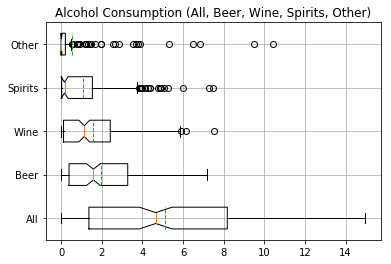

In [12]:
center = stats.tmean(all_alcohol)
max_val = stats.tmax(all_alcohol)
min_val = stats.tmin(all_alcohol)
iqr = stats.iqr(all_alcohol)
q1 = np.percentile(all_alcohol, 25)
q3 = np.percentile(all_alcohol, 75)
iqr_2 = (q3 - q1)
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
#flier_high = max_alc
#flier_low = min_alc
#data = np.concatenate((all_alcohol), axis=None)
#print(data)
#plt.title('Basic Plot')
labels = ['All', 'Beer', 'Wine', 'Spirits', 'Other']
data = [all_alcohol, beer_df, spirits_df, wine_df, other_df]
f = plt.figure()
plt.boxplot(data, vert=False, notch=True, showmeans=True, labels=labels, meanline=True)
plt.title('Alcohol Consumption (All, Beer, Wine, Spirits, Other)')
plt.grid()
plt.show()
f.savefig("foo.pdf", bbox_inches='tight')

In [8]:
iqr = stats.iqr(wine_df)
q1 = np.percentile(wine_df, 25)
q3 = np.percentile(wine_df, 75)
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
num_outliers = len(wine_df[wine_df >= upper_boundary])
num_outliers

18

In [9]:
iqr = stats.iqr(spirits_df)
q1 = np.percentile(spirits_df, 25)
q3 = np.percentile(spirits_df, 75)
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
num_outliers = len(spirits_df[spirits_df >= upper_boundary])
num_outliers

3

In [10]:
iqr = stats.iqr(other_df)
q1 = np.percentile(other_df, 25)
q3 = np.percentile(other_df, 75)
lower_boundary = q1 - (1.5 * iqr)
upper_boundary = q3 + (1.5 * iqr)
num_outliers = len(other_df[other_df >= upper_boundary])
num_outliers

29